<a href="https://colab.research.google.com/github/Umadeviganti/Data_Science/blob/main/Capstone_Milstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.1 MB/s eta 0:00:00


**1. Milestone 1: [ Score: 40 points]**

‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data. [ 3 points ]

‣ Step 2: Map training and testing images to its classes. [ 4 points ]

‣ Step 3: Map training and testing images to its annotations. [ 4 points ]

‣ Step 4: Preprocessing and Visualisation of different classes [4 Points]

‣ Step 5: Display images with bounding box. [ 5 points ]

‣ Step 6: Design, train and test basic CNN models for classification. [ 10 points ]

‣ Step 7: Interim report [ 10 points ]

In [3]:
import zipfile  #Use the zipfile module to open and read the zip file.
import os       #to interact with the operating system
import pydicom
import numpy as np
import pandas as pd
import cv2
import gc  # Garbage collection for memory management
import traceback  # For detailed error traceback
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class_info=pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_detailed_class_info.csv")
train_labels=pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_train_labels.csv")

In [5]:
# Display the first few rows of each DataFrame
print("Class Info:")
print(class_info.head())

Class Info:
                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


In [6]:
print("\nTrain Labels:")
print(train_labels.head())


Train Labels:
                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1


In [7]:
# Check the shape of the DataFrames
print(f"Class Info shape: {class_info.shape}")
print(f"Train Labels shape: {train_labels.shape}")

Class Info shape: (30227, 2)
Train Labels shape: (30227, 6)


In [8]:
# Basic information about the class info data
print("\nClass Info DataFrame Info:")
print(class_info.info())


Class Info DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB
None


In [9]:
# Basic information about the train labels data
print("\nTrain Labels DataFrame Info:")
print(train_labels.info())


Train Labels DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
None


In [10]:
# Summary statistics
print("\nSummary Statistics for Train Labels:")
print(train_labels.describe())


Summary Statistics for Train Labels:
                 x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000


**Insight into the summary statistics for your train labels:**
**Count:**
There are 9,555 entries for the x, y, width, and height columns, which represent image bounding box coordinates and dimensions.

The Target column has a total of 30,227 entries, indicating the presence of multiple targets or objects per image or might be missing values in x,y,width and heigh columns.

**Mean and Standard Deviation:**

The average x and y coordinates are approximately 394 and 367, respectively, with a relatively high standard deviation, suggesting a wide distribution of bounding box positions across the images.

The width and height have means of around 218 and 329, respectively, indicating that the bounding boxes tend to be rectangular, with the height generally larger than the width.

The Target column mean is 0.316, showing that around 31.6% of the labels correspond to the positive class (1), highlighting class imbalance in the dataset.

**Distribution:**

The minimum and maximum values for x, y, width, and height show the range of possible values, with x ranging from 2 to 835, y from 2 to 881, width from 40 to 528, and height from 45 to 942.

The Target column ranges from 0 to 1, indicating binary classification.

**Quartiles:**

For x and y, the 25th, 50th (median), and 75th percentiles suggest that most bounding boxes are positioned centrally in the images, as the median values are around the image center.

The width and height quartiles show that most bounding boxes are between 177-259 for width and 203-438 for height, indicating some variability in object size.

The 75th percentile for the Target column is 1.0, reinforcing the imbalance, as only the top 25% have a positive target.

**Conclusion**

Overall, these statistics suggest that the dataset may require additional balancing techniques, such as resampling or augmentation, to improve model performance on the minority class. Additionally, the distribution of bounding box dimensions and positions should be considered during model training to ensure robust detection across various object sizes and locations.

In [11]:
# Check for missing values in class info
print("\nMissing values in class_info:")
print(class_info.isnull().sum())



Missing values in class_info:
patientId    0
class        0
dtype: int64


In [12]:
# Check for missing values in train labels
print("\nMissing values in train_labels:")
print(train_labels.isnull().sum())
print("\nMissing values percentages in train_labels:")
print(train_labels.isnull().mean()*100)


Missing values in train_labels:
patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Missing values percentages in train_labels:
patientId     0.000000
x            68.389188
y            68.389188
width        68.389188
height       68.389188
Target        0.000000
dtype: float64


**Significant Missing Data in Bounding Boxes:**
*   68% of dataset lacks bounding box annotations.
*   The absence of bounding box data likely corresponds to the Target value being 0, indicating the absence of the object of interest in those images.
*   If primary goal is classification (0 vs. 1), then the missing bounding boxes can be ignored for class 0, focusing on the target variable.
*   We can consider using techniques like resampling, synthetic data generation, or weighting to address class imbalance.

Addressing this imbalance and using appropriate strategies for handling missing data will be key to effective modeling.





In [13]:
# Group by Target and count missing values
missing_values_by_target = train_labels.groupby('Target').apply(lambda df: df.isnull().sum())
print("\nMissing values by Target:")
print(missing_values_by_target)


Missing values by Target:
        patientId      x      y  width  height  Target
Target                                                
0               0  20672  20672  20672   20672       0
1               0      0      0      0       0       0


In [14]:
# Distribution of classes in class_info
print("\nClass distribution in class_info:")
print(class_info['class'].value_counts())


Class distribution in class_info:
class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64


In [15]:
# Distribution of target labels in train_labels
print("\nTarget distribution in train_labels:")
print(train_labels['Target'].value_counts())


Target distribution in train_labels:
Target
0    20672
1     9555
Name: count, dtype: int64


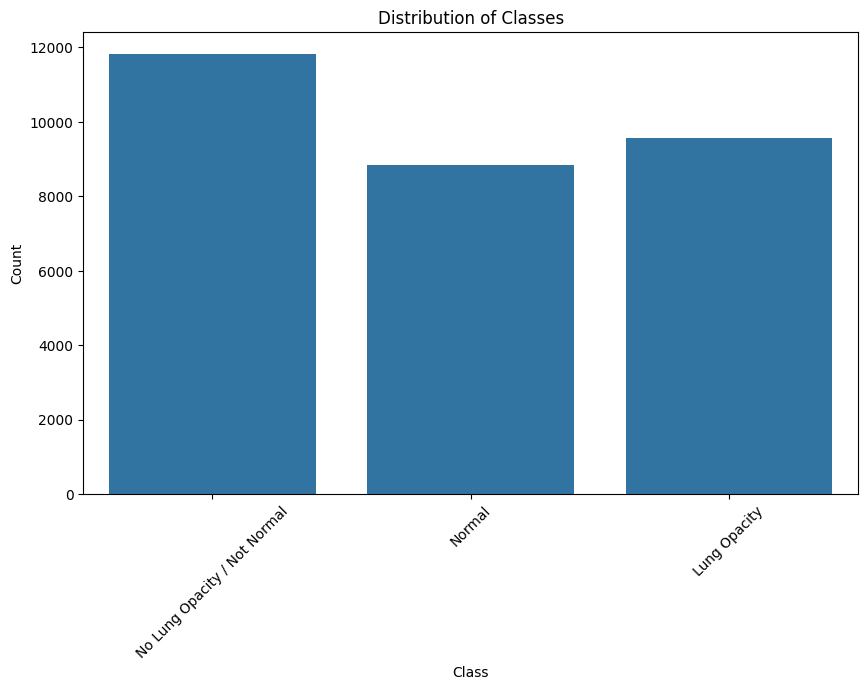

In [16]:
# Distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=class_info, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The dataset is somewhat imbalanced, with the "No Lung Opacity / Not Normal" class being the largest group.we can consider techniques like resampling or class weighting to address the class imbalance in model training.

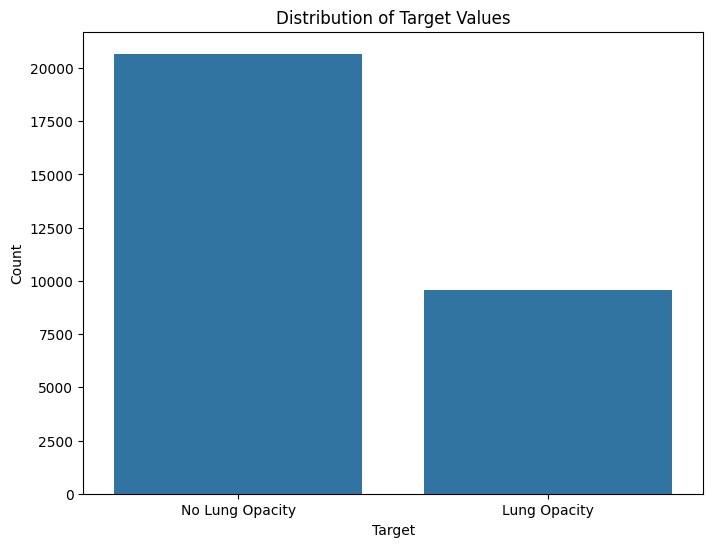

In [17]:
# Distribution of target values
plt.figure(figsize=(8, 6))
sns.countplot(data=train_labels, x='Target')
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Lung Opacity', 'Lung Opacity'])
plt.show()


The dataset is imbalanced, with significantly more samples for class 0 compared to class 1.We can use resampling or class weighting strategies to improve model performance on the minority class (class 1).

In [18]:
# Merge the DataFrames on 'patientId'
merged_df = pd.merge(train_labels, class_info, on='patientId')

In [19]:
# Check the merged DataFrame
print(merged_df.head())

                              patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity  


In [20]:
def extract_dicom_from_zip(zip_file_path, extraction_path):
    """
    Extract DICOM (.dcm) files from a zip archive, ignoring the __MACOSX folder.

    Parameters:
    - zip_file_path: Path to the zip file.
    - extraction_path: Path to the directory where files should be extracted.

    Returns:
    - A list of DICOM file paths.
    """
    dicom_files = []

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            for file_info in zip_ref.infolist():
                file_name = file_info.filename

                # Ignore __MACOSX folders
                if '__MACOSX' in file_name:
                    continue

                # Check if the file is a DICOM image
                if file_name.lower().endswith('.dcm'):
                    file_path = os.path.join(extraction_path, file_name)

                    # Ensure the directory structure is created
                    if file_info.is_dir():
                        os.makedirs(file_path, exist_ok=True)
                    else:
                        zip_ref.extract(file_info, extraction_path)
                        dicom_files.append(file_path)

                        print(f"Extracted DICOM file: {file_name}")

    except zipfile.BadZipFile as e:
        print(f"Error: Bad zip file {zip_file_path}. Details: {str(e)}")
    except Exception as e:
        print(f"Unexpected error during extraction: {str(e)}")
        traceback.print_exc()

    return dicom_files

In [21]:
def load_dicom_image(file_path):
    """
    Load a DICOM image and convert it to a NumPy array.

    Parameters:
    - file_path: Path to the DICOM file.

    Returns:
    - A tuple containing the file path and the DICOM image data as a NumPy array.
    """
    try:
        dicom_image = pydicom.dcmread(file_path)

        # Convert DICOM image to a NumPy array
        image_array = dicom_image.pixel_array

        # Normalize the image to range 0-255
        image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        return file_path, image_array
    except Exception as e:
        print(f"Failed to load DICOM file {file_path}. Error: {str(e)}")
        traceback.print_exc()
        return file_path, None


In [22]:
def list_extracted_files(extraction_path):
    """
    List all the DICOM files in the extraction directory.

    Parameters:
    - extraction_path: Path to the directory where files are extracted.

    Returns:
    - List of DICOM file paths.
    """
    dicom_files = []

    for root, dirs, files in os.walk(extraction_path):
        for file in files:
            if file.lower().endswith('.dcm'):
                dicom_files.append(os.path.join(root, file))

    return dicom_files

In [23]:
def display_images(image_tuples, title="Images"):
    """
    Display a list of images.

    Parameters:
    - image_tuples: List of tuples, where each tuple contains a file path and a NumPy array of the image.
    - title: Title for the image display.
    """
    fig, axs = plt.subplots(1, len(image_tuples), figsize=(15, 5))
    fig.suptitle(title)

    for i, (file_path, image_array) in enumerate(image_tuples):
        if image_array is not None:
            axs[i].imshow(image_array, cmap='gray')
            axs[i].set_title(os.path.basename(file_path))
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, 'Error', fontsize=12, ha='center')

    plt.show()

In [24]:
train_zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_train_images.zip'
test_zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_test_images.zip'

In [25]:
# Define the paths
train_extraction_path = '/content/path/to/extracted/train_images/stage_2_train_images'
test_extraction_path = '/content/path/to/extracted/test_images'

In [26]:
# Ensure directories exist
os.makedirs(train_extraction_path, exist_ok=True)
os.makedirs(test_extraction_path, exist_ok=True)

In [27]:
# Extract DICOM files
train_dicom_files = extract_dicom_from_zip(train_zip_file_path, train_extraction_path)
test_dicom_files = extract_dicom_from_zip(test_zip_file_path, test_extraction_path)

Streaming output truncated to the last 5000 lines.
Extracted DICOM file: stage_2_train_images/b329ead1-3d20-43af-b0d9-bc4e98ec2239.dcm
Extracted DICOM file: stage_2_train_images/5cc6b134-74ea-4443-b2f2-9e6d81d2010b.dcm
Extracted DICOM file: stage_2_train_images/9fb4b913-c36b-4de9-abba-518897e49e94.dcm
Extracted DICOM file: stage_2_train_images/610ea636-e9df-4a9b-a396-867c06d10cb1.dcm
Extracted DICOM file: stage_2_train_images/3360d5d9-e1b5-448f-87a4-df15eed8a095.dcm
Extracted DICOM file: stage_2_train_images/e5f10650-f97d-4671-9954-7a579b593ea9.dcm
Extracted DICOM file: stage_2_train_images/42da1a6f-7984-4d82-b10a-603b8e3724c5.dcm
Extracted DICOM file: stage_2_train_images/a3407a92-03ba-4ec2-9373-845bda60ea7b.dcm
Extracted DICOM file: stage_2_train_images/95fa653c-bcbf-44ea-8749-f764594e9b7f.dcm
Extracted DICOM file: stage_2_train_images/694c58e8-4cc3-43ff-af14-11c5216b0c14.dcm
Extracted DICOM file: stage_2_train_images/6829b50e-6124-4b09-bbb4-7f2d18b1fd4b.dcm
Extracted DICOM file: sta

In [28]:
# List and print the extracted DICOM files
train_dicom_files = list_extracted_files(train_extraction_path)
test_dicom_files = list_extracted_files(test_extraction_path)

print(f"Number of train DICOM files: {len(train_dicom_files)}")
print(f"Number of test DICOM files: {len(test_dicom_files)}")

Number of train DICOM files: 26684
Number of test DICOM files: 3000


In [29]:
# Load a few sample images
sample_train_images = [load_dicom_image(f) for f in train_dicom_files[:3]]
sample_test_images = [load_dicom_image(f) for f in test_dicom_files[:3]]

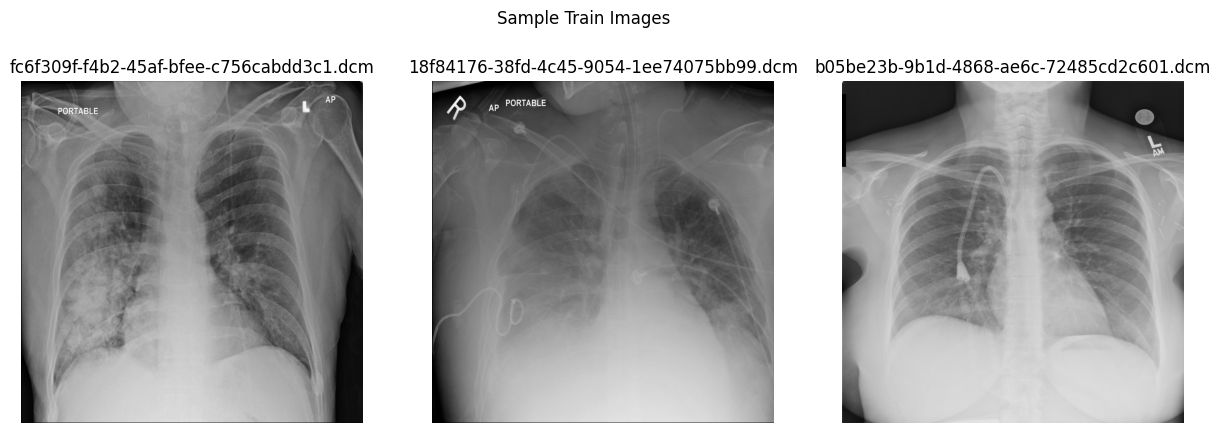

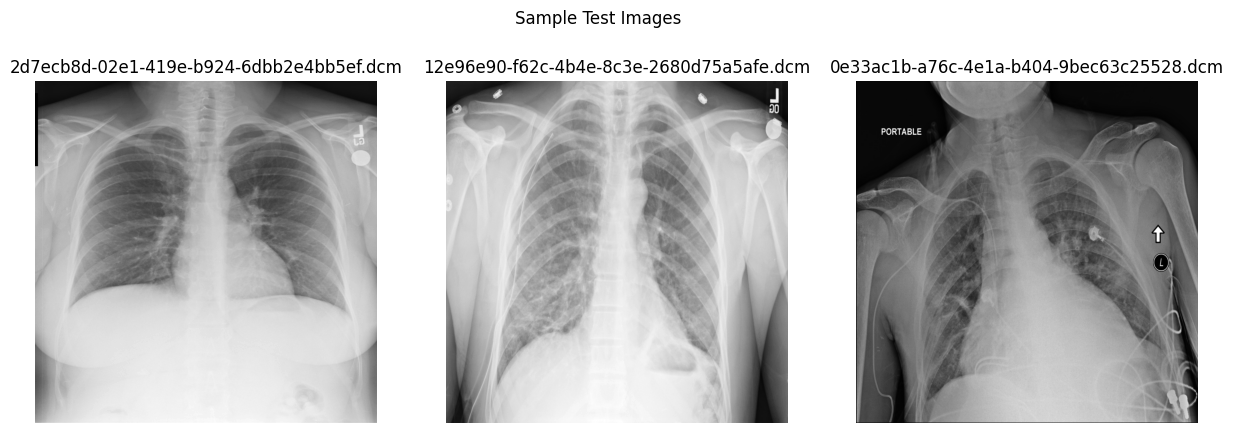

In [30]:
# Display the sample images
display_images(sample_train_images, title="Sample Train Images")
display_images(sample_test_images, title="Sample Test Images")

In [31]:
# Function to load DICOM images and extract basic information
def load_dicom_info(extraction_path):
    dicom_info = []
    for root, _, files in os.walk(extraction_path):
        for file in files:
            if file.lower().endswith('.dcm'):
                file_path = os.path.join(root, file)
                try:
                    dicom_image = pydicom.dcmread(file_path)
                    image_data = {
                        'file_path': file_path,
                        'patient_id': dicom_image.PatientID,
                        'width': dicom_image.Columns,
                        'height': dicom_image.Rows,
                        'modality': dicom_image.Modality,
                        'pixel_spacing': dicom_image.PixelSpacing,
                        'bits_stored': dicom_image.BitsStored,
                        'image_position': dicom_image.ImagePositionPatient if 'ImagePositionPatient' in dicom_image else None
                    }
                    dicom_info.append(image_data)
                except Exception as e:
                    print(f"Failed to read DICOM file {file_path}: {str(e)}")
    return pd.DataFrame(dicom_info)

In [32]:
# Load DICOM info for train and test sets
train_dicom_info = load_dicom_info(train_extraction_path)
test_dicom_info = load_dicom_info(test_extraction_path)

In [33]:
# 1. Basic Information
print(f"Number of train images: {len(train_dicom_info)}")
print(f"Number of test images: {len(test_dicom_info)}")
print(f"Unique patient IDs in train set: {train_dicom_info['patient_id'].nunique()}")
print(f"Unique patient IDs in test set: {test_dicom_info['patient_id'].nunique()}")

Number of train images: 26684
Number of test images: 3000
Unique patient IDs in train set: 26684
Unique patient IDs in test set: 3000


In [34]:
# 2. Data Summary
print("\nTrain DICOM Info Summary:")
print(train_dicom_info.describe(include='all'))
print("\nTest DICOM Info Summary:")
print(test_dicom_info.describe(include='all'))



Train DICOM Info Summary:
                                                file_path  \
count                                               26684   
unique                                              26684   
top     /content/path/to/extracted/train_images/stage_...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                  patient_id    width   height modality  \
count                                  26684  26684.0  26684.0    26684   
unique                                 26684      NaN      NaN        1   
top     fc6f309

In [35]:
# Check for missing values in DICOM info
print("\nMissing values in train DICOM info:")
print(train_dicom_info.isnull().sum())
print("\nMissing values in test DICOM info:")
print(test_dicom_info.isnull().sum())



Missing values in train DICOM info:
file_path             0
patient_id            0
width                 0
height                0
modality              0
pixel_spacing         0
bits_stored           0
image_position    26684
dtype: int64

Missing values in test DICOM info:
file_path            0
patient_id           0
width                0
height               0
modality             0
pixel_spacing        0
bits_stored          0
image_position    3000
dtype: int64


In [36]:
# Merge class info with DICOM data
dicom_class_info = pd.merge(train_dicom_info, class_info, left_on='patient_id', right_on='patientId', how='left')
print(dicom_class_info.head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width  height modality  \
0  fc6f309f-f4b2-45af-bfee-c756cabdd3c1   1024    1024       CR   
1  18f84176-38fd-4c45-9054-1ee74075bb99   1024    1024       CR   
2  b05be23b-9b1d-4868-ae6c-72485cd2c601   1024    1024       CR   
3  1757b96d-2340-420f-a7eb-d8899466e682   1024    1024       CR   
4  ce649e4b-1461-4c34-908d-b0561ac155a6   1024    1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.139, 0.139]            8           None   
1                              [0.139, 0.139]            8           None   
2                            

**Observations:**

**Image Dimensions:** Both train and test images are consistently 1024x1024 pixels.

**Modality:** All images are of modality 'CR' (Computed Radiography).

**Pixel Spacing:** The values vary but are consistent within the dataset.

**Bits Stored:** All images use 8 bits per pixel.

**Aspect Ratio:** Consistent at 1.0 for all images.

In [37]:
# Define a function to visualize sample images from the merged DataFrame
def visualize_sample_images(dicom_class_df, num_samples=5):
    sample_df = dicom_class_df.sample(n=num_samples)
    image_tuples = []
    for _, row in sample_df.iterrows():
        image_file = row['file_path']
        image_array = load_dicom_image(image_file)[1]  # Only need the array
        image_tuples.append((image_file, image_array))
    display_images(image_tuples, title="Sample Images")


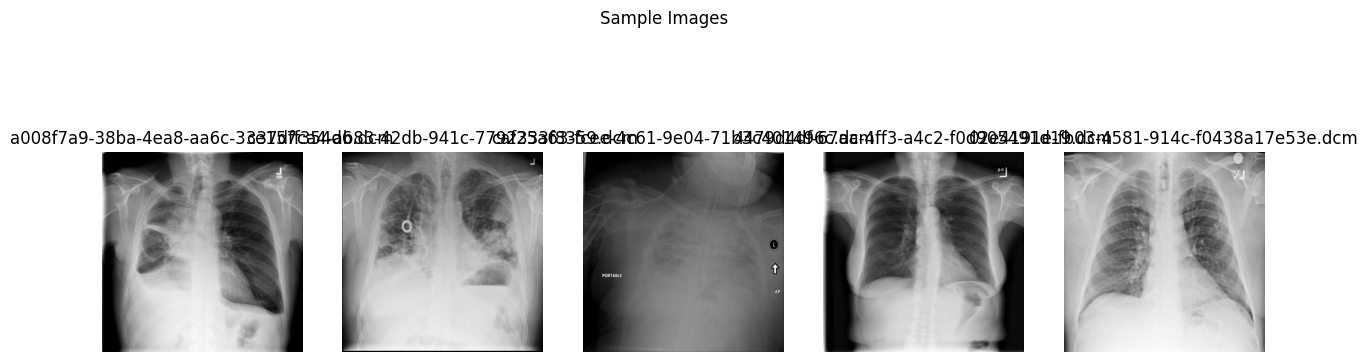

In [38]:
# Visualize sample images
visualize_sample_images(dicom_class_info)

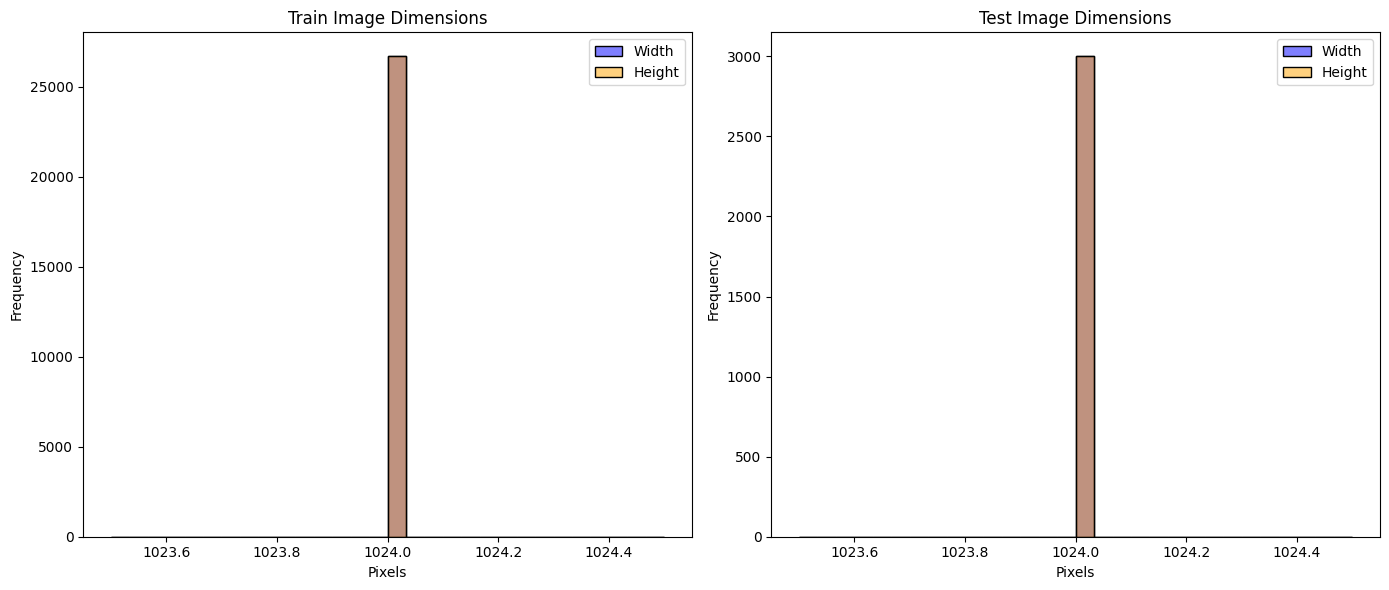

In [39]:
# Plot image dimensions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_dicom_info['width'], kde=True, color='blue', label='Width', bins=30)
sns.histplot(train_dicom_info['height'], kde=True, color='orange', label='Height', bins=30)
plt.title('Train Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(test_dicom_info['width'], kde=True, color='blue', label='Width', bins=30)
sns.histplot(test_dicom_info['height'], kde=True, color='orange', label='Height', bins=30)
plt.title('Test Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# Check column names in the training DICOM info DataFrame
print("Columns in train_dicom_info:")
print(train_dicom_info.columns)

Columns in train_dicom_info:
Index(['file_path', 'patient_id', 'width', 'height', 'modality',
       'pixel_spacing', 'bits_stored', 'image_position'],
      dtype='object')


In [41]:
# Check column names in the training labels DataFrame
print("\nColumns in train_labels:")
print(train_labels.columns)


Columns in train_labels:
Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')


In [42]:
# Rename the 'patientId' column in train_labels to 'patient_id'
train_labels.rename(columns={'patientId': 'patient_id'}, inplace=True)

In [43]:
# Verify the column names after renaming
print("Updated Columns in train_labels:")
print(train_labels.columns)

Updated Columns in train_labels:
Index(['patient_id', 'x', 'y', 'width', 'height', 'Target'], dtype='object')


In [44]:
# Merge the training DICOM info with the labels based on 'patient_id'
train_data = pd.merge(train_dicom_info, train_labels, on='patient_id', how='left')

In [45]:
# Display the first few rows of the merged DataFrame
print("\nMerged Training Data:")
print(train_data.head())


Merged Training Data:
                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width_x  height_x modality  \
0  fc6f309f-f4b2-45af-bfee-c756cabdd3c1     1024      1024       CR   
1  18f84176-38fd-4c45-9054-1ee74075bb99     1024      1024       CR   
2  b05be23b-9b1d-4868-ae6c-72485cd2c601     1024      1024       CR   
3  1757b96d-2340-420f-a7eb-d8899466e682     1024      1024       CR   
4  ce649e4b-1461-4c34-908d-b0561ac155a6     1024      1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.139, 0.139]            8           None   
1                              [0.139, 0.139]            8 

In [46]:
# Create a dictionary mapping image paths to their classes
train_image_to_class = dict(zip(train_data['file_path'], train_data['Target']))

In [47]:
# Display the first few mappings
print("\nTraining Image to Class Mapping (first 5):")
for i, (img_path, cls) in enumerate(train_image_to_class.items()):
    if i >= 5:
        break
    print(f"{img_path}: {cls}")


Training Image to Class Mapping (first 5):
/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/fc6f309f-f4b2-45af-bfee-c756cabdd3c1.dcm: 1
/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/18f84176-38fd-4c45-9054-1ee74075bb99.dcm: 1
/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/b05be23b-9b1d-4868-ae6c-72485cd2c601.dcm: 0
/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/1757b96d-2340-420f-a7eb-d8899466e682.dcm: 0
/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/ce649e4b-1461-4c34-908d-b0561ac155a6.dcm: 1


In [48]:
# Check for missing values in the merged DataFrame
missing_values = train_data.isnull().sum()
print("Missing Values in Merged DataFrame:")
print(missing_values)

Missing Values in Merged DataFrame:
file_path             0
patient_id            0
width_x               0
height_x              0
modality              0
pixel_spacing         0
bits_stored           0
image_position    30227
x                 20672
y                 20672
width_y           20672
height_y          20672
Target                0
dtype: int64


In [49]:
# Check unique patient IDs
unique_patient_ids_dicom = train_dicom_info['patient_id'].unique()
unique_patient_ids_labels = train_labels['patient_id'].unique()

In [50]:
# Verify if all patient IDs in the merged DataFrame are present in both original datasets
merged_patient_ids = train_data['patient_id'].unique()

In [51]:
print("Unique patient IDs in DICOM info:", len(unique_patient_ids_dicom))
print("Unique patient IDs in labels:", len(unique_patient_ids_labels))
print("Unique patient IDs in merged data:", len(merged_patient_ids))
print("Are all patient IDs from the merged data in DICOM info and labels?:",
      all(id in unique_patient_ids_dicom for id in merged_patient_ids) and
      all(id in unique_patient_ids_labels for id in merged_patient_ids))

Unique patient IDs in DICOM info: 26684
Unique patient IDs in labels: 26684
Unique patient IDs in merged data: 26684
Are all patient IDs from the merged data in DICOM info and labels?: True


In [53]:
# Find duplicates based on patient_id and Target
duplicates = train_data[train_data.duplicated(subset=['patient_id', 'Target'], keep=False)]

# Check if there are any patient_id with multiple Target values
patient_id_duplicates = train_data.groupby('patient_id')['Target'].nunique()
patients_with_multiple_labels = patient_id_duplicates[patient_id_duplicates > 1]

# Print results
print("Number of duplicate entries in the dataset:")
print(duplicates)

print("\nPatient IDs with multiple labels:")
print(patients_with_multiple_labels)


Number of duplicate entries in the dataset:
                                               file_path  \
27     /content/path/to/extracted/train_images/stage_...   
28     /content/path/to/extracted/train_images/stage_...   
31     /content/path/to/extracted/train_images/stage_...   
32     /content/path/to/extracted/train_images/stage_...   
37     /content/path/to/extracted/train_images/stage_...   
...                                                  ...   
30211  /content/path/to/extracted/train_images/stage_...   
30223  /content/path/to/extracted/train_images/stage_...   
30224  /content/path/to/extracted/train_images/stage_...   
30225  /content/path/to/extracted/train_images/stage_...   
30226  /content/path/to/extracted/train_images/stage_...   

                                 patient_id  width_x  height_x modality  \
27     5bfdc9ee-e21d-46e5-bbfc-20cea10c3175     1024      1024       CR   
28     5bfdc9ee-e21d-46e5-bbfc-20cea10c3175     1024      1024       CR   
31     17f

In [54]:
# Add flags for missing values in the 'image_position' column
train_data['image_position_missing'] = train_data['image_position'].isnull().astype(int)


In [55]:
# Add flags for missing values in the bounding box information
train_data['x_missing'] = train_data['x'].isnull().astype(int)
train_data['y_missing'] = train_data['y'].isnull().astype(int)
train_data['width_y_missing'] = train_data['width_y'].isnull().astype(int)
train_data['height_y_missing'] = train_data['height_y'].isnull().astype(int)

In [56]:
# Display the updated DataFrame to verify flags
print(train_data.head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width_x  height_x modality  \
0  fc6f309f-f4b2-45af-bfee-c756cabdd3c1     1024      1024       CR   
1  18f84176-38fd-4c45-9054-1ee74075bb99     1024      1024       CR   
2  b05be23b-9b1d-4868-ae6c-72485cd2c601     1024      1024       CR   
3  1757b96d-2340-420f-a7eb-d8899466e682     1024      1024       CR   
4  ce649e4b-1461-4c34-908d-b0561ac155a6     1024      1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.139, 0.139]            8           None   
1                              [0.139, 0.139]            8           None   
2    

In [ ]:
# Optional: Save the updated DataFrame with flags
#train_data.to_csv('/content/drive/MyDrive/Capstone Project/train_data_with_flags.csv', index=False)

In [57]:
# Initialize the dictionary to store annotations
annotations = {}

In [58]:
# Iterate over each row in train_data
for index, row in train_data.iterrows():
    image_path = row['file_path']

    # Check if the annotations should be included based on the flags
    if row['Target'] == 1:
        # Extract bounding box details if the target is 1
        annotation = {
            'x': row['x'] if row['x_missing'] == 0 else None,
            'y': row['y'] if row['y_missing'] == 0 else None,
            'width': row['width_y'] if row['width_y_missing'] == 0 else None,
            'height': row['height_y'] if row['height_y_missing'] == 0 else None,
            'target': row['Target']
        }
    else:
        # For Target == 0 or 'Not Normal No Lung Opacity', set annotations to None if missing
        annotation = {
            'x': None,
            'y': None,
            'width': None,
            'height': None,
            'target': row['Target']
        }

    # Add the annotation to the dictionary
    annotations[image_path] = annotation


In [59]:
# Print some sample annotations
for i, (image_path, annotation) in enumerate(list(annotations.items())[:5]):
    print(f"Image Path: {image_path}")
    print(f"Annotations: {annotation}")
    print()

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/fc6f309f-f4b2-45af-bfee-c756cabdd3c1.dcm
Annotations: {'x': 126.0, 'y': 474.0, 'width': 201.0, 'height': 337.0, 'target': 1}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/18f84176-38fd-4c45-9054-1ee74075bb99.dcm
Annotations: {'x': 608.0, 'y': 521.0, 'width': 341.0, 'height': 274.0, 'target': 1}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/b05be23b-9b1d-4868-ae6c-72485cd2c601.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/1757b96d-2340-420f-a7eb-d8899466e682.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/ce649e4b-1461-4c34-908d-b0561ac155

In [73]:
# Normalize and Resize Images
'''def preprocess_image(image_path, target_size=(128, 128)):
    try:
        # Load the DICOM file
        dicom = pydicom.dcmread(image_path)

        # Extract the image data as a NumPy array
        image = dicom.pixel_array

        # Normalize the image
        image_normalized = image / np.max(image)

        # Resize the image
        image_resized = cv2.resize(image_normalized, target_size)

        return image_resized
    except Exception as e:
        print(f"Warning: Failed to process image at path: {image_path}. Error: {str(e)}")
        return None
///'''

In [92]:
def preprocess_image(image_path, target_size=(128, 128)):
    # Load the DICOM image
    try:
        dicom_image = pydicom.dcmread(image_path)
        image = dicom_image.pixel_array
    except Exception as e:
        print(f"Error reading DICOM file: {image_path}. Error: {e}")
        return None

    # Convert to grayscale if necessary
    if len(image.shape) == 3:
        image = np.mean(image, axis=-1)  # Convert to grayscale

    # Resize the image
    image_resized = cv2.resize(image, target_size)

    # Normalize the image
    image_normalized = image_resized / 255.0

    return image_normalized

In [93]:
# Display a few images with bounding boxes
def plot_sample_images_with_bboxes(train_data, num_samples=5):
    plt.figure(figsize=(15, 10))

    for i in range(num_samples):
        img_info = train_data.iloc[i]
        image_path = img_info['image_path']  # Assuming the column name is 'image_path'
        image = preprocess_image(image_path)

        # Plot image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')

        # Draw bounding box if available
        if img_info['Target'] == 1:
            x, y, width, height = img_info['x'], img_info['y'], img_info['width_y'], img_info['height_y']
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none'))

        plt.title(f"Target: {img_info['Target']}")
        plt.axis('off')

    plt.show()

In [94]:
# Visualize Class Distribution
def plot_class_distribution(train_data):
    sns.countplot(x='Target', data=train_data)
    plt.title("Class Distribution")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.show()

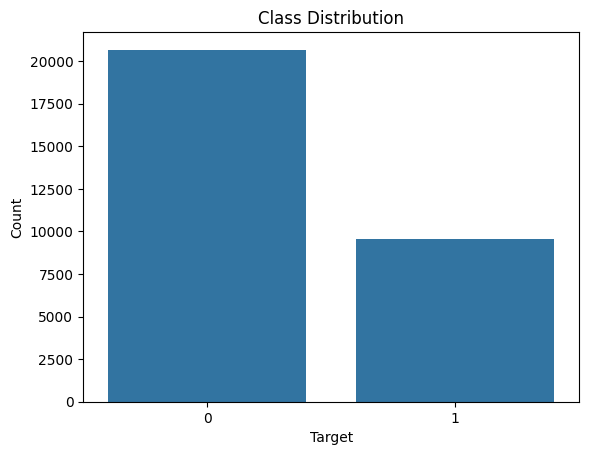

In [95]:
plot_class_distribution(train_data)

In [97]:
image_path = train_data['file_path'].iloc[0]
processed_image = preprocess_image(image_path)
if processed_image is not None:
    print("Image processed successfully")
else:
    print("Failed to process image")


Image processed successfully


In [98]:
# Preprocess Images
train_data['preprocessed_image'] = train_data['file_path'].apply(preprocess_image)

In [99]:
# Count the number of problematic paths where the function returned None
problematic_paths_count = train_data['preprocessed_image'].isnull().sum()

print(f"Number of problematic paths: {problematic_paths_count}")

Number of problematic paths: 0


In [100]:
# Check a few entries to confirm that the images were processed successfully
print(train_data[['file_path', 'preprocessed_image']].head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                                  preprocessed_image  
0  [[0.023529411764705882, 0.0196078431372549, 0....  
1  [[0.3607843137254902, 0.3607843137254902, 0.36...  
2  [[0.1843137254901961, 0.1411764705882353, 0.13...  
3  [[0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.0...  
4  [[0.10196078431372549, 0.09803921568627451, 0....  


In [101]:
def visualize_preprocessed_image(image_array):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.show()



Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/fc6f309f-f4b2-45af-bfee-c756cabdd3c1.dcm


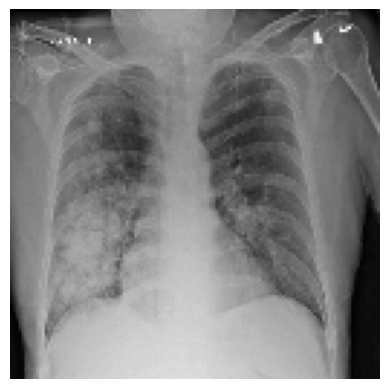

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/18f84176-38fd-4c45-9054-1ee74075bb99.dcm


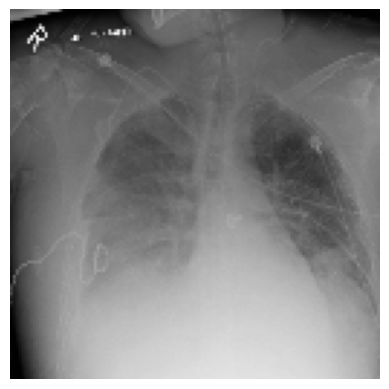

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/b05be23b-9b1d-4868-ae6c-72485cd2c601.dcm


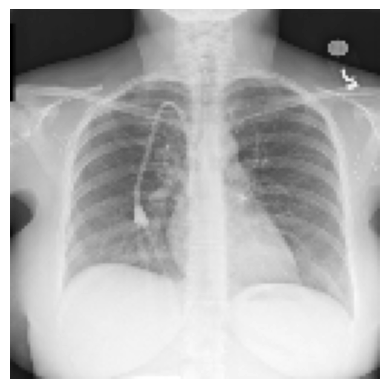

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/1757b96d-2340-420f-a7eb-d8899466e682.dcm


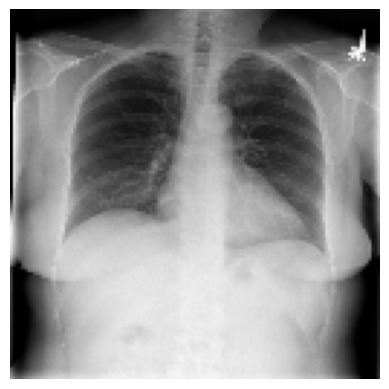

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/ce649e4b-1461-4c34-908d-b0561ac155a6.dcm


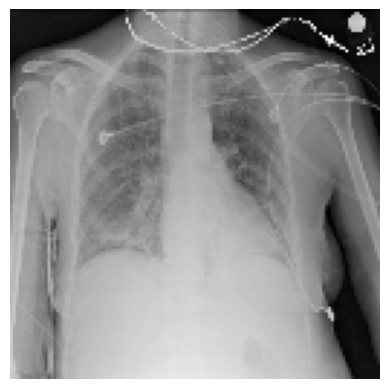

In [102]:
# Visualize a few preprocessed images
for i in range(5):
    print(f"Image Path: {train_data['file_path'].iloc[i]}")
    visualize_preprocessed_image(train_data['preprocessed_image'].iloc[i])

In [108]:
def draw_bounding_box(image, x, y, width, height):
    if pd.isna(x) or pd.isna(y) or pd.isna(width) or pd.isna(height):
        return image  # Return the image as is if any value is missing

    # Convert to int for OpenCV
    x, y, width, height = int(x), int(y), int(width), int(height)

    # Draw rectangle around the bounding box
    image_with_bbox = cv2.rectangle(image.copy(), (x, y), (x + width, y + height), (255, 0, 0), 2)

    return image_with_bbox

In [109]:
def display_images_with_bboxes(train_data):
    # Ensure columns are properly named and exist
    required_columns = ['file_path', 'x', 'y', 'width_y', 'height_y']
    for column in required_columns:
        if column not in train_data.columns:
            raise KeyError(f"Column '{column}' is missing from the DataFrame.")

    for index, row in train_data.iterrows():
        image_path = row['file_path']
        x = row['x']
        y = row['y']
        width = row['width_y']
        height = row['height_y']

        # Load the image
        image = preprocess_image(image_path)

        if image is None:
            continue

        # Draw bounding box
        image_with_bbox = draw_bounding_box(image, x, y, width, height)

        # Display image
        plt.figure(figsize=(8, 8))
        plt.imshow(image_with_bbox, cmap='gray')
        plt.title(f"Image: {image_path}")
        plt.axis('off')
        plt.show()

        # Optionally, display only a subset of images
        if index > 10:  # Display first 10 images
            break

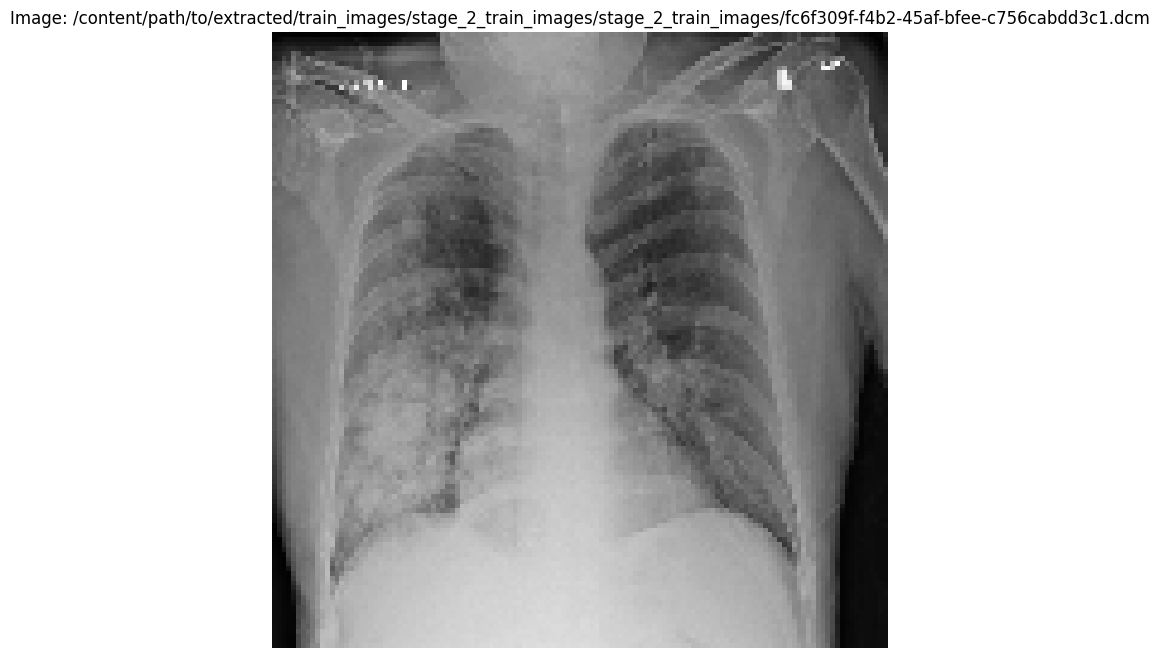

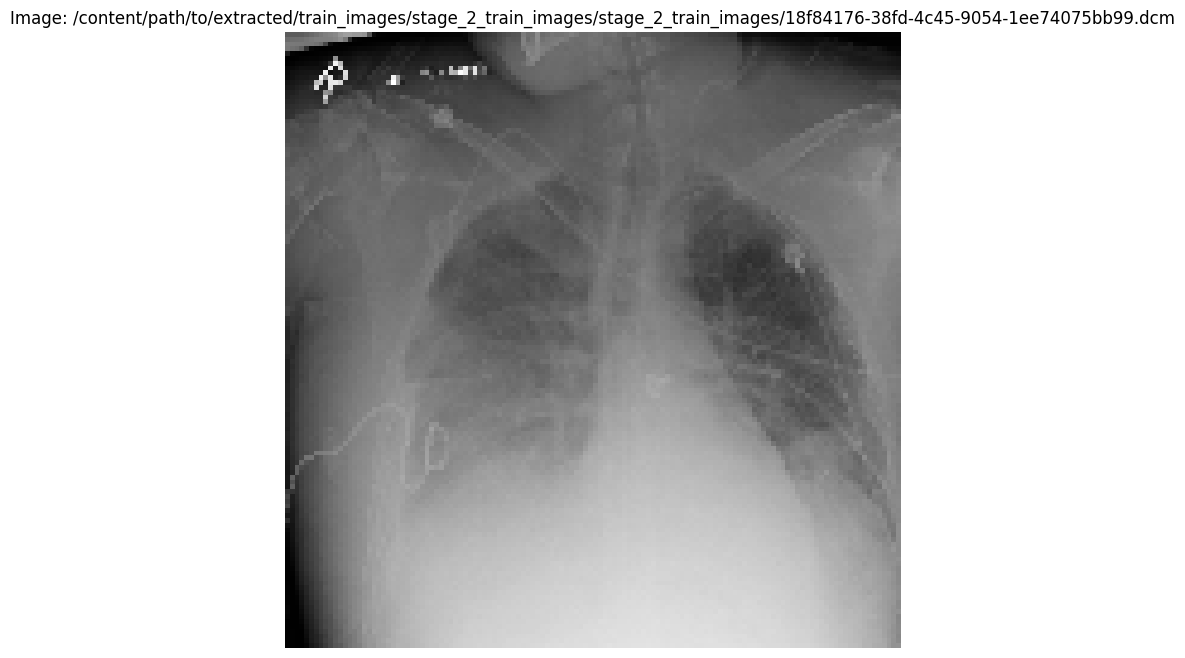

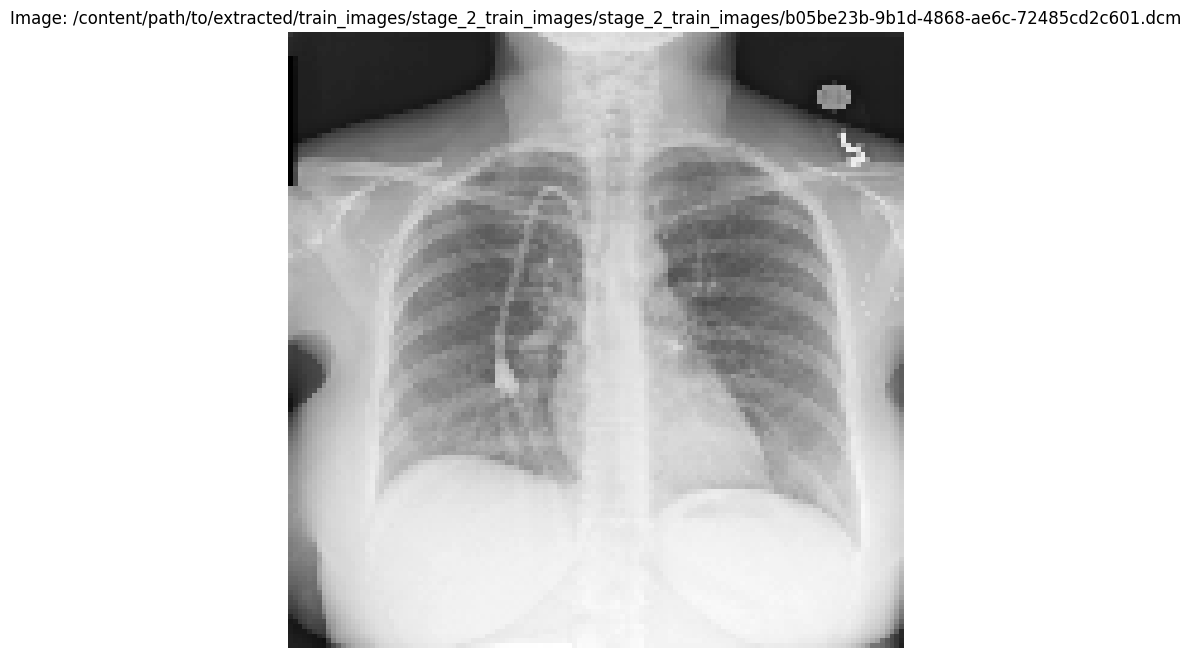

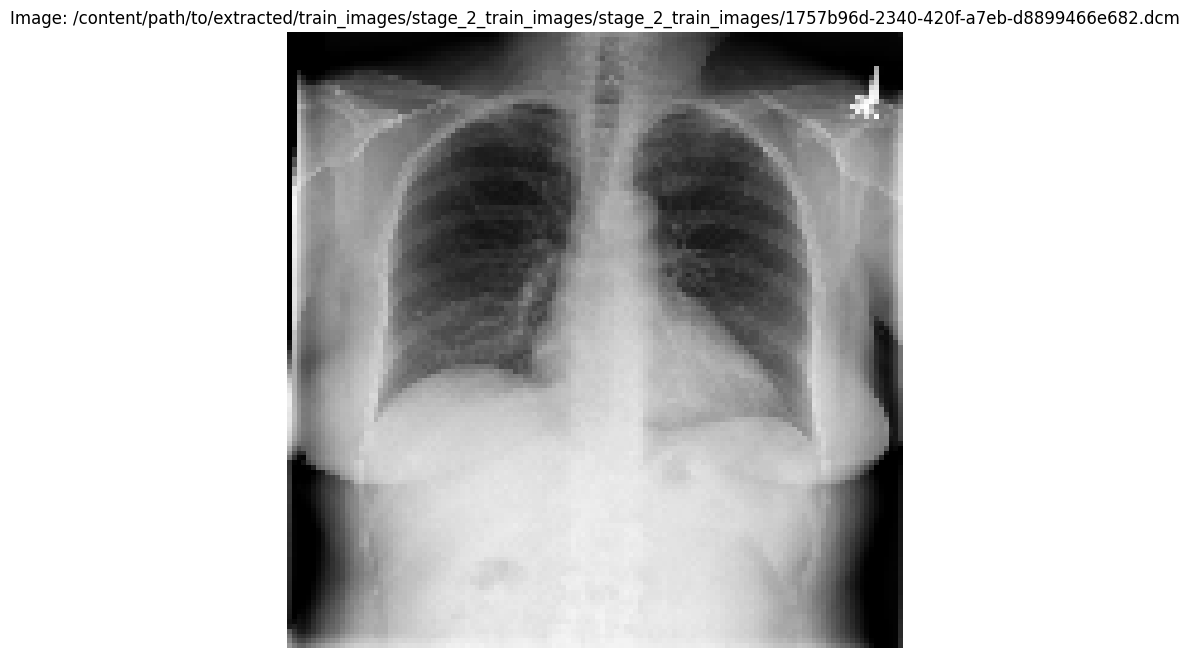

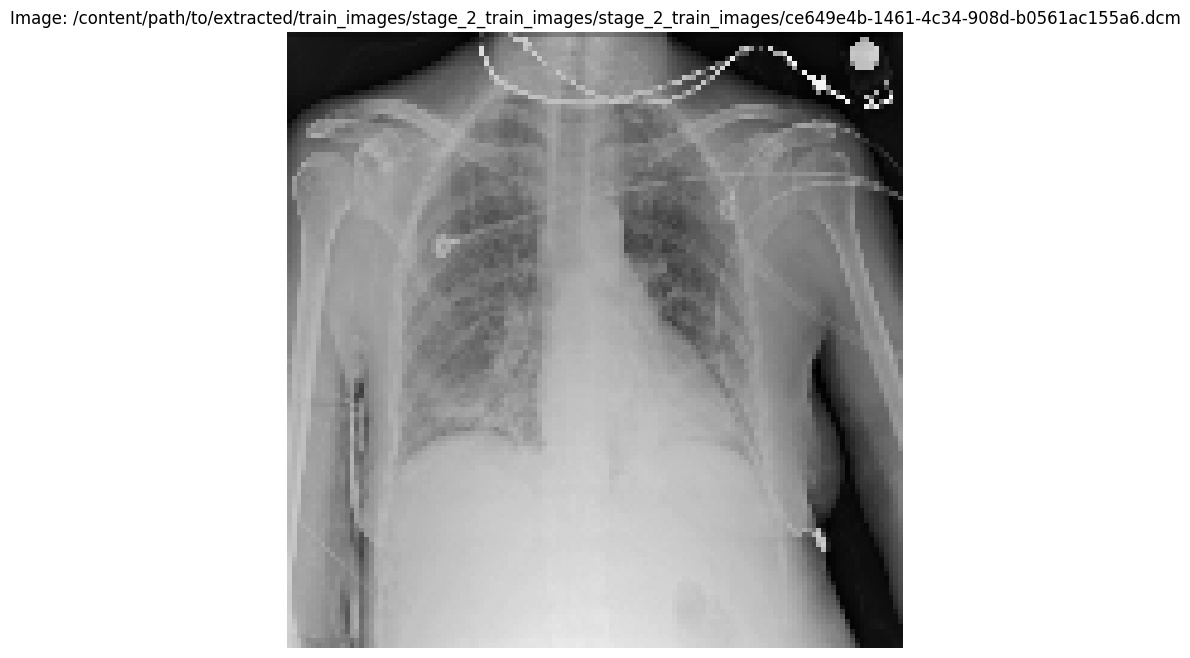

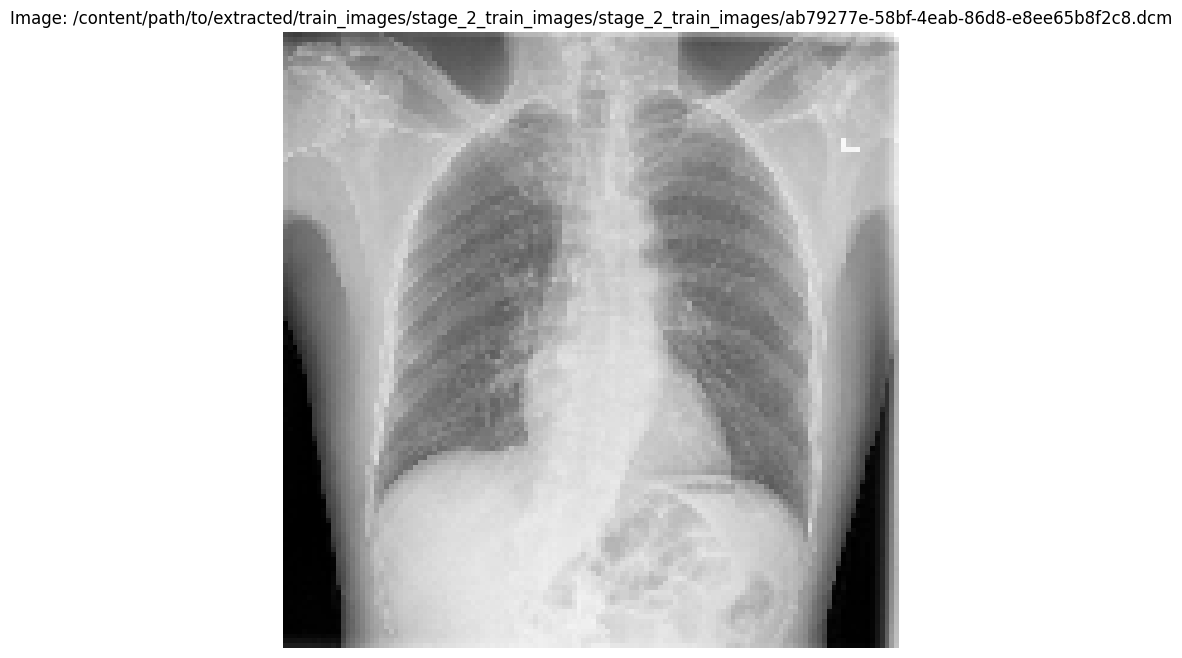

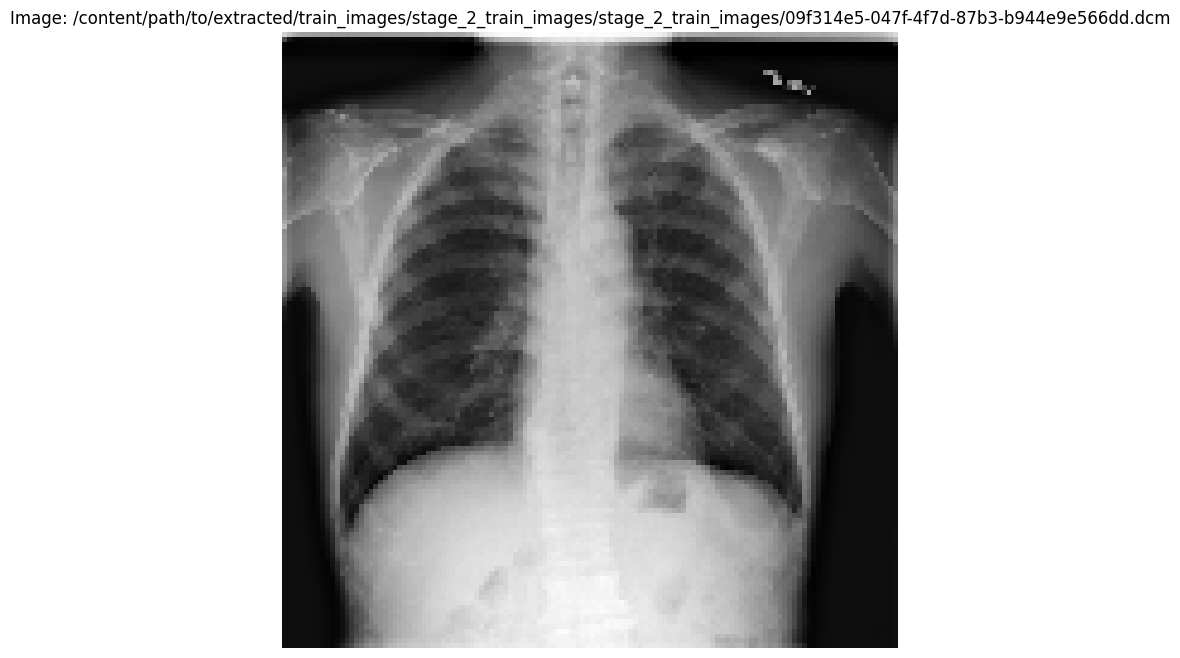

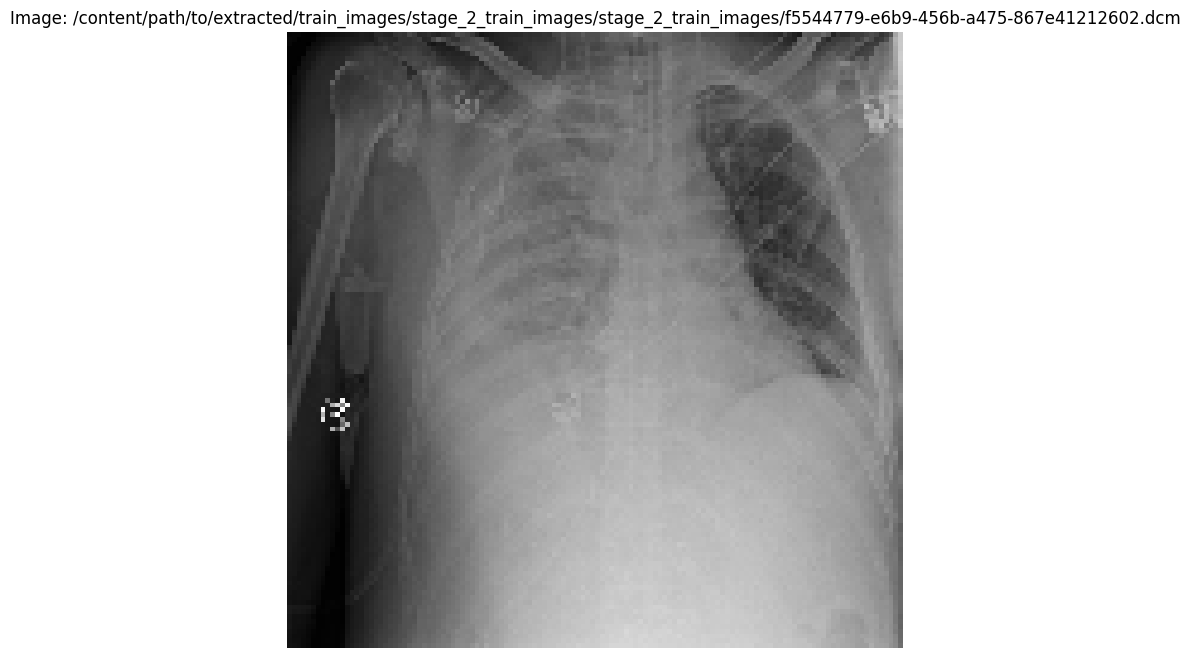

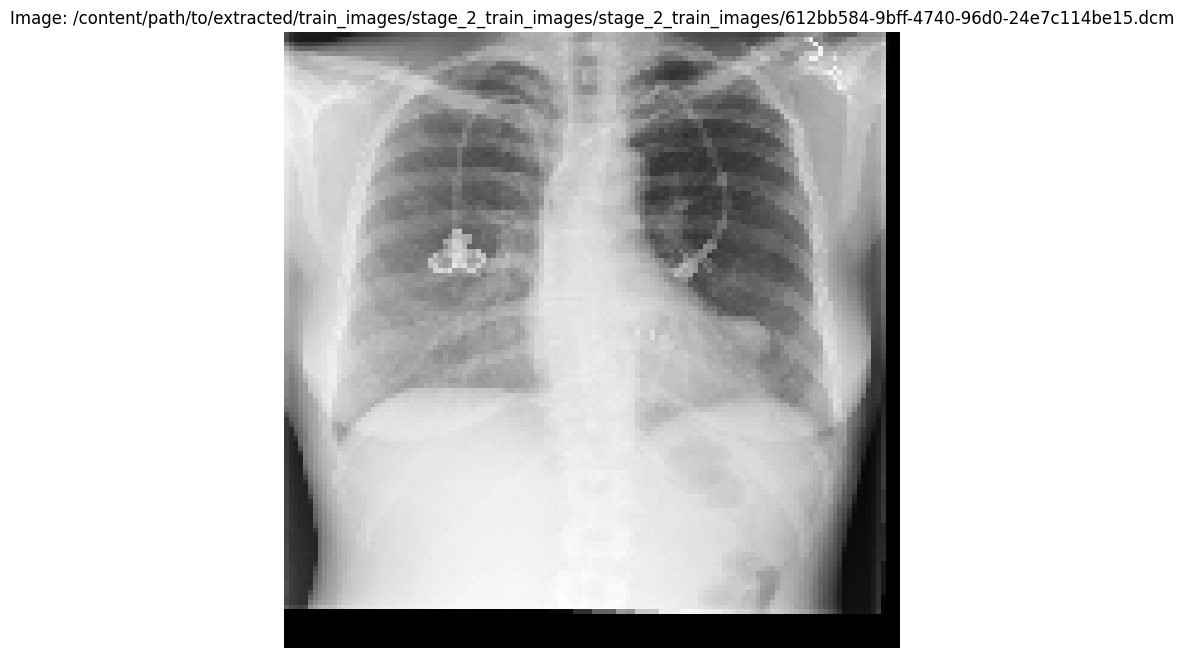

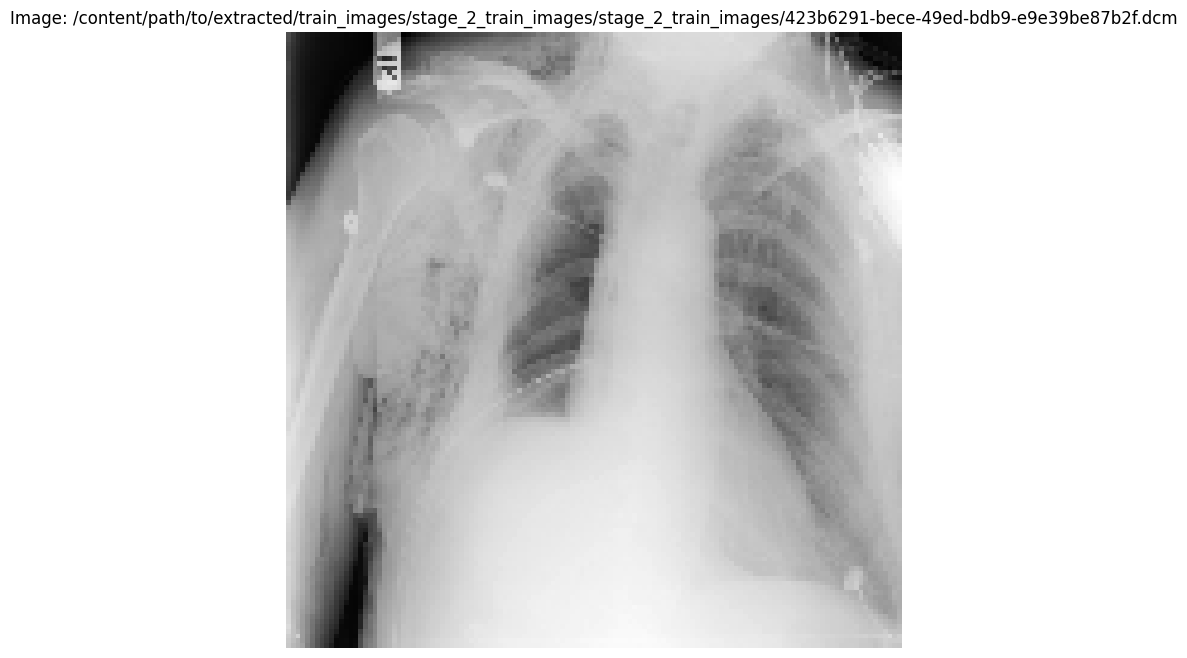

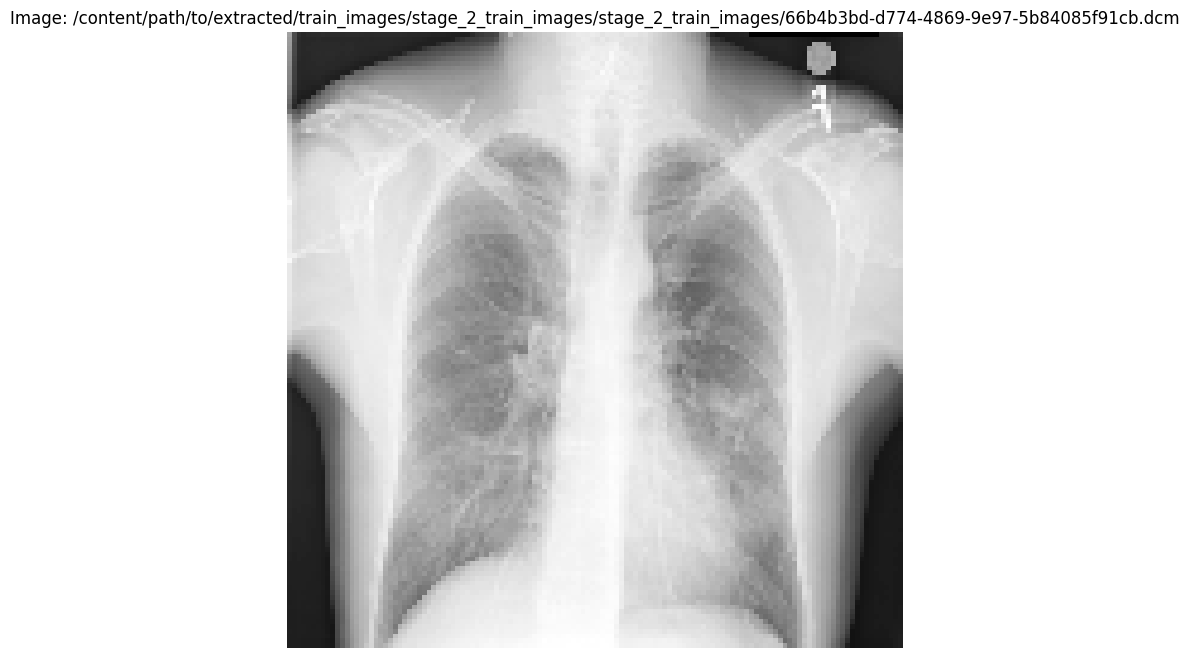

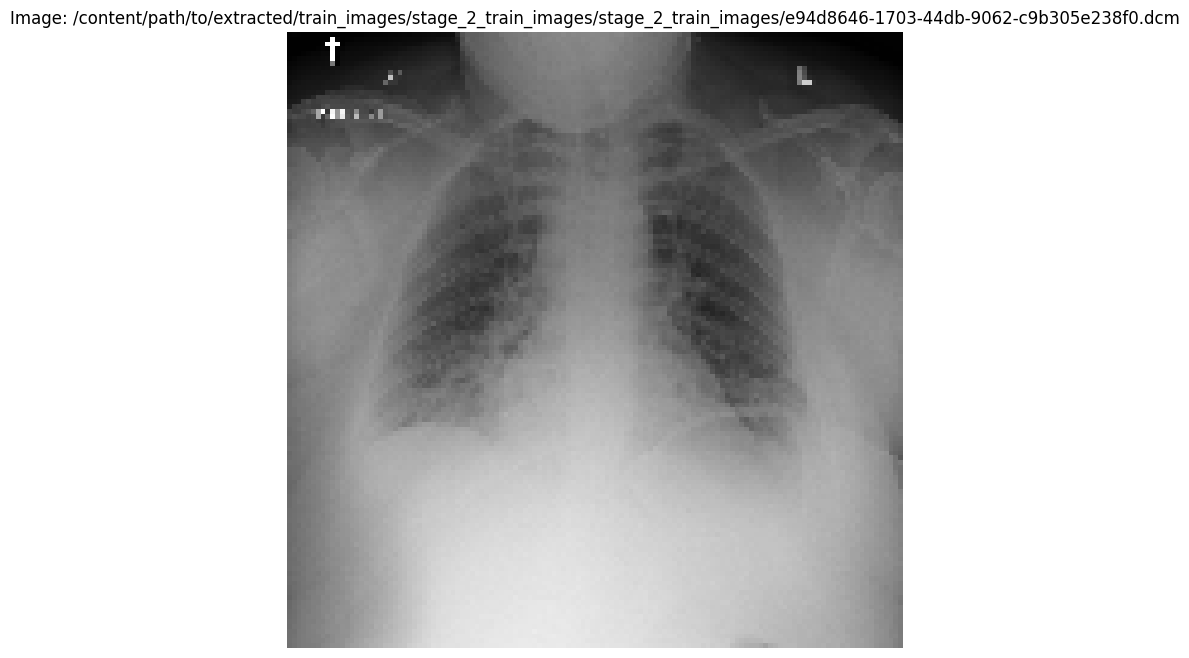

In [110]:
# Assuming train_data is the DataFrame containing the paths and annotations
display_images_with_bboxes(train_data)

In [88]:
# Print column names to verify
print(train_data.columns)

Index(['file_path', 'patient_id', 'width_x', 'height_x', 'modality',
       'pixel_spacing', 'bits_stored', 'image_position', 'x', 'y', 'width_y',
       'height_y', 'Target', 'image_position_missing', 'x_missing',
       'y_missing', 'width_y_missing', 'height_y_missing',
       'preprocessed_image'],
      dtype='object')
